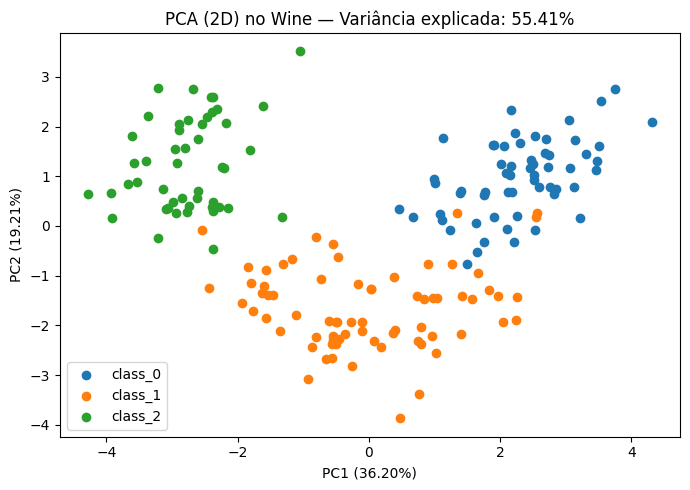

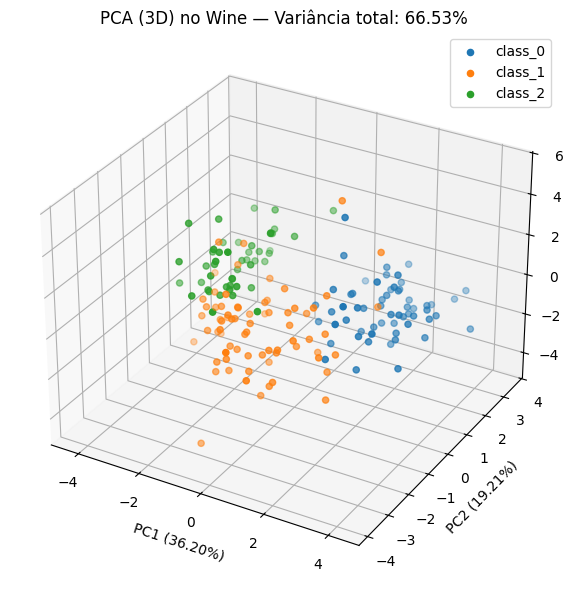


=== Primeiras 5 linhas (2 PCs) ===
        PC1       PC2
0  3.316751  1.443463
1  2.209465 -0.333393
2  2.516740  1.031151
3  3.757066  2.756372
4  1.008908  0.869831

=== Variância explicada (2 PCs) ===
  Componente  Variância explicada
0        PC1             0.361988
1        PC2             0.192075
Total (2 PCs): 55.41%

=== Variância explicada (3 PCs) ===
  Componente  Variância explicada
0        PC1             0.361988
1        PC2             0.192075
2        PC3             0.111236
Total (3 PCs): 66.53%


In [ ]:
# ============================================
# PCA no dataset Wine (scikit-learn) — Exemplo didático
# ============================================

# ---------- Imports ----------
import numpy as np                      # Biblioteca numérica (arrays e operações vetoriais)
import pandas as pd                     # Tabelas (DataFrames) para inspeção fácil
import matplotlib.pyplot as plt         # Gráficos
from mpl_toolkits.mplot3d import Axes3D # Projeção 3D para matplotlib (apenas para ativar o 3D)
from sklearn import datasets            # Conjuntos de dados de exemplo (inclui "wine")
from sklearn.preprocessing import StandardScaler  # Normalização/standardização
from sklearn.decomposition import PCA   # Algoritmo PCA

# ---------- 1) Carregar dados ----------
wine = datasets.load_wine()             # Carrega o dataset Wine (13 features, 3 classes)
X = wine.data                           # Matriz de features (n_amostras x 13)
y = wine.target                         # Vetor de rótulos (0, 1, 2)
target_names = wine.target_names        # Nomes das classes (ex.: 'class_0', 'class_1', 'class_2')
feature_names = wine.feature_names      # Nomes das 13 variáveis originais

# ---------- 2) Normalizar dados ----------
scaler = StandardScaler()               # Cria o normalizador (média=0, desvio padrão=1 por feature)
X_std = scaler.fit_transform(X)         # Ajusta às features e transforma (importante para PCA)

# ---------- 3) PCA com 2 componentes ----------
pca2 = PCA(n_components=2, random_state=42)  # Define PCA para reduzir para 2 dimensões
X_pca2 = pca2.fit_transform(X_std)      # Ajusta o PCA aos dados normalizados e obtém as 2 componentes
var_ratio2 = pca2.explained_variance_ratio_  # Percentagens de variância explicada por PC1 e PC2
var_total2 = var_ratio2.sum()           # Soma da variância explicada pelas 2 componentes

# ---------- 4) Gráfico 2D das 2 componentes ----------
plt.figure(figsize=(7, 5))              # Cria figura para o gráfico 2D
for i, name in enumerate(target_names): # Itera pelas 3 classes
    idx = y == i                         # Seleciona amostras da classe i
    plt.scatter(X_pca2[idx, 0],         # Eixo X: PC1
                X_pca2[idx, 1],         # Eixo Y: PC2
                label=name)              # Legenda com o nome da classe
plt.title(f"PCA (2D) no Wine — Variância explicada: {var_total2:.2%}")  # Título com variância total
plt.xlabel(f"PC1 ({var_ratio2[0]:.2%})")  # Rótulo do eixo X com % da PC1
plt.ylabel(f"PC2 ({var_ratio2[1]:.2%})")  # Rótulo do eixo Y com % da PC2
plt.legend()                           # Mostra legenda
plt.tight_layout()                     # Ajusta layout para evitar sobreposições
plt.show()                             # Exibe o gráfico 2D

# ---------- 5) PCA com 3 componentes ----------
pca3 = PCA(n_components=3, random_state=42)  # Define PCA para 3 dimensões (melhor visualização 3D)
X_pca3 = pca3.fit_transform(X_std)      # Ajusta e transforma para obter PC1, PC2, PC3
var_ratio3 = pca3.explained_variance_ratio_  # Variância explicada por PC1, PC2 e PC3
var_total3 = var_ratio3.sum()           # Variância total captada pelas 3 PCs

# ---------- 6) Gráfico 3D das 3 componentes ----------
fig = plt.figure(figsize=(8, 6))        # Cria figura para o gráfico 3D
ax = fig.add_subplot(111, projection='3d')  # Adiciona eixo 3D

for i, name in enumerate(target_names): # Itera pelas classes para desenhar cada grupo
    idx = y == i                         # Índices da classe i
    ax.scatter(X_pca3[idx, 0],          # Eixo X: PC1
               X_pca3[idx, 1],          # Eixo Y: PC2
               X_pca3[idx, 2],          # Eixo Z: PC3
               label=name)               # Legenda com o nome da classe

ax.set_title(f"PCA (3D) no Wine — Variância total: {var_total3:.2%}")  # Título com % total
ax.set_xlabel(f"PC1 ({var_ratio3[0]:.2%})")  # Rótulo eixo X com % da PC1
ax.set_ylabel(f"PC2 ({var_ratio3[1]:.2%})")  # Rótulo eixo Y com % da PC2
ax.set_zlabel(f"PC3 ({var_ratio3[2]:.2%})")  # Rótulo eixo Z com % da PC3
ax.legend()                           # Mostra legenda
plt.tight_layout()                    # Ajusta layout
plt.show()                            # Exibe o gráfico 3D

# ---------- 7) (Opcional) Imprimir tabelas de apoio ----------
df_pcs2 = pd.DataFrame(X_pca2, columns=["PC1", "PC2"])  # DataFrame com as 2 PCs (todas as amostras)
df_info2 = pd.DataFrame({                              # Tabela de variância explicada (2 PCs)
    "Componente": ["PC1", "PC2"],
    "Variância explicada": var_ratio2
})
df_info3 = pd.DataFrame({                              # Tabela de variância explicada (3 PCs)
    "Componente": ["PC1", "PC2", "PC3"],
    "Variância explicada": var_ratio3
})

print("\n=== Primeiras 5 linhas (2 PCs) ===")  # Cabeçalho para leitura
print(df_pcs2.head())                           # Mostra as primeiras 5 amostras nas 2 PCs
print("\n=== Variância explicada (2 PCs) ===") # Cabeçalho
print(df_info2)                                 # Mostra % explicada por PC1 e PC2
print(f"Total (2 PCs): {var_total2:.2%}")       # Mostra total de variância captada pelas 2 PCs

print("\n=== Variância explicada (3 PCs) ===") # Cabeçalho
print(df_info3)                                 # Mostra % explicada por PC1, PC2 e PC3
print(f"Total (3 PCs): {var_total3:.2%}")       # Mostra total de variância captada pelas 3 PCs

# ---------- Nota pedagógica ----------
# - Por que normalizar? Sem standardização, variáveis em escalas maiores dominam a variância.
# - O PCA encontra eixos ortogonais (PC1, PC2, ...) que maximizam a variância do conjunto.
# - Reduzir de 13 -> 2/3 dimensões facilita visualização e pode reduzir ruído/colinearidade.
# - Em classificação, o PCA é frequentemente usado como pré-processamento antes do modelo.
